<a href="https://colab.research.google.com/github/light3w3/DNN-1-/blob/main/DNN_%EA%B8%B0%EB%B3%B8%EB%AA%A8%EB%8D%B81%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


100%|██████████| 2000/2000 [09:35<00:00,  3.48it/s]

46/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

[✅ Classification Report - TEST DATA]
              precision    recall  f1-score   support

           0       0.54      0.89      0.67      1000
           1       0.68      0.23      0.34      1000

    accuracy                           0.56      2000
   macro avg       0.61      0.56      0.51      2000
weighted avg       0.61      0.56      0.51      2000



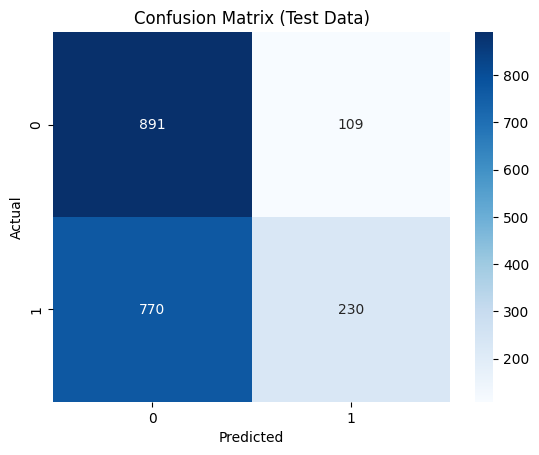

In [8]:
# -------------------------------------------
# 1. 경로 설정
# -------------------------------------------
test_audio_path = '/content/drive/MyDrive/2501ml_data/test'
test_label_path = '/content/drive/MyDrive/2501ml_data/label/test_label.txt'

# -------------------------------------------
# 2. test_label.txt 불러오기
# -------------------------------------------
with open(test_label_path, 'r') as f:
    lines = f.readlines()

test_data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 5:
        speaker_id = parts[0]
        filename = parts[1]
        label = parts[-1]
        test_data.append((filename, label, speaker_id))

test_df = pd.DataFrame(test_data, columns=['filename', 'label', 'speaker_id'])

# -------------------------------------------
# 3. MFCC 평균 추출
# -------------------------------------------
test_mfcc_list = []
test_labels = []

for _, row in tqdm(test_df.iterrows(), total=len(test_df)):
    filename = row['filename']
    label = 0 if row['label'] == 'Real' else 1
    file_path = os.path.join(test_audio_path, filename)

    if not os.path.isfile(file_path):
        print(f"파일 없음: {filename}")
        continue

    try:
        y, sr = librosa.load(file_path, sr=16000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        test_mfcc_list.append(mfcc_mean)
        test_labels.append(label)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# -------------------------------------------
# 4. 전처리 (train 기준으로 정규화)
# -------------------------------------------
X_test = StandardScaler().fit_transform(test_mfcc_list)
y_test = np.array(test_labels)

# -------------------------------------------
# 5. 모델 예측 및 평가
# -------------------------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\n[✅ Classification Report - TEST DATA]")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data)")
plt.show()


100%|██████████| 4000/4000 [01:19<00:00, 50.06it/s]


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.8232 - loss: 5.2901
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9937 - loss: 0.0292
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9897 - loss: 0.0399
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9966 - loss: 0.0149
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9968 - loss: 0.0128
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9967 - loss: 0.0142
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9994 - loss: 0.0056
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9985 - loss: 0.0048
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9976 - loss: 0.0103
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9978 - loss: 0.0058
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9986 - loss: 0.0031
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 

100%|██████████| 2000/2000 [00:38<00:00, 51.60it/s]



✅ [TEST 평가 결과]
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1000
           1       1.00      0.77      0.87      1000

    accuracy                           0.88      2000
   macro avg       0.91      0.88      0.88      2000
weighted avg       0.91      0.88      0.88      2000



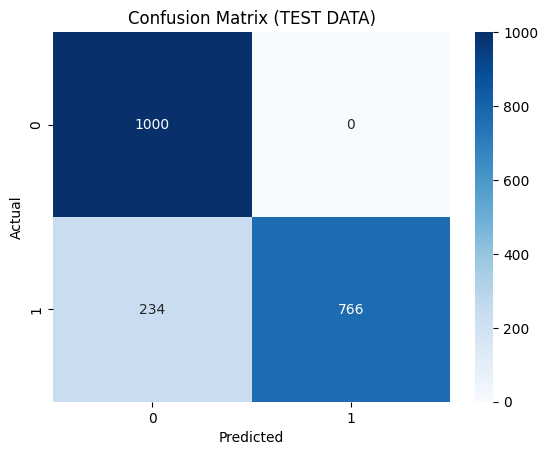

In [10]:
# -------------------------------------------
# 1. 설치 및 라이브러리 로드
# -------------------------------------------
!pip install umap-learn --quiet

import os
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

# -------------------------------------------
# 2. 경로 설정
# -------------------------------------------
train_audio_path = '/content/drive/MyDrive/2501ml_data/train'
train_label_path = '/content/drive/MyDrive/2501ml_data/label/train_label.txt'

test_audio_path = '/content/drive/MyDrive/2501ml_data/test'
test_label_path = '/content/drive/MyDrive/2501ml_data/label/test_label.txt'

# -------------------------------------------
# 3. 데이터 로딩 함수 (공통)
# -------------------------------------------
def load_mfcc_data(audio_path, label_path, max_len=200):
    with open(label_path, 'r') as f:
        lines = f.readlines()

    data = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 5:
            speaker_id = parts[0]
            filename = parts[1]
            label = parts[-1]
            data.append((filename, label, speaker_id))

    df = pd.DataFrame(data, columns=['filename', 'label', 'speaker_id'])

    X_list = []
    y_list = []

    for _, row in tqdm(df.iterrows(), total=len(df)):
        filename = row['filename']
        label = 0 if row['label'] == 'Real' else 1
        file_path = os.path.join(audio_path, filename)

        if not os.path.isfile(file_path):
            continue

        try:
            y, sr = librosa.load(file_path, sr=16000)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfcc = mfcc.T  # (T, 13)

            if mfcc.shape[0] < max_len:
                pad_width = max_len - mfcc.shape[0]
                mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)), mode='constant')
            else:
                mfcc = mfcc[:max_len, :]

            X_list.append(mfcc)
            y_list.append(label)
        except:
            continue

    return np.array(X_list), np.array(y_list)

# -------------------------------------------
# 4. 학습 데이터 로딩
# -------------------------------------------
X_train, y_train = load_mfcc_data(train_audio_path, train_label_path)

# -------------------------------------------
# 5. CNN 모델 설계
# -------------------------------------------
max_len = 200

model = models.Sequential([
    layers.Input(shape=(max_len, 13)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -------------------------------------------
# 6. 모델 학습 (validation 없음)
# -------------------------------------------
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    verbose=1)

# -------------------------------------------
# 7. 테스트 데이터 로딩
# -------------------------------------------
X_test, y_test = load_mfcc_data(test_audio_path, test_label_path)

# -------------------------------------------
# 8. 테스트 데이터 평가
# -------------------------------------------
print("\n✅ [TEST 평가 결과]")
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (TEST DATA)")
plt.show()
